# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy`

**Volumen mínimo**. Considere un cono circular recto circunscrito en una esfera de radio $r$:

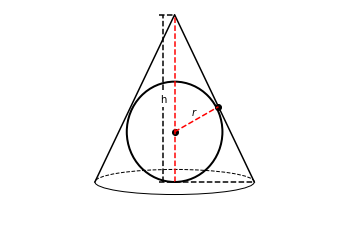

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, 0), 2,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, 0), 2,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0.6), 0.6,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([1,0,-1],[0,2,0],'k')
plt.plot([0,0],[0,2],'--r')
plt.plot([-0.2,0],[0,0],'--k')
plt.plot([-0.2,0],[2,2],'--k')
plt.plot([-0.14,-0.14],[0,0.9],'--k')
plt.plot([-0.14,-0.14],[1.1,2],'--k')
plt.plot([0,0.55],[0.6,0.9],'--r')
plt.scatter([0,0.55],[0.6,0.9],c='k')
plt.plot([0,1],[0,0],'--k')

plt.text(-0.18,0.95,'h')
plt.text(0.2,0.8,'$r$')

plt.axis([-2.1,2.1,-0.5,2.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $h$ que minimiza el volumen para un radio $r=2$.
3. ¿Cuál es el volumen mínimo del cono?

$v = \frac{h\pi*r^2}{3}$

$R = \sqrt{\frac{-4h}{4-h}}$

$$ V = \frac{\pi\frac{-4h}{4-h}}3{h}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

sp.var("h")

def vol(h):
    return ((np.pi*h*((-4*h)/(4-h)))/3)

In [2]:
diff = sp.diff(vol(h), h)
pc = sp.solve(diff, h)
pc

[0.0, 8.00000000000000]

Altura = 8
Volumen = 67

---
# Segundo punto. Programación lineal

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia?

In [3]:
import scipy.optimize as opt

In [4]:
import numpy as np

In [5]:

c = np.array([-22, -20])

A = np.array([
    [2.5, 3], 
    [3, 6], 
    [14, 10], 
    [1, 1],
    [-1, 0],
])

b = np.array([
    [4500, 8400, 20000, 1700, -600]
])

In [6]:
sol = opt.linprog(c, A, b, method="simplex") #Se pone simplex para que no nos de numeros con decimales
sol


     con: array([], dtype=float64)
     fun: -34705.882352941175
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([   0.        , 1164.70588235,    0.        ,   52.94117647,
        282.35294118])
  status: 0
 success: True
       x: array([882.35294118, 764.70588235])

882 A

764 B

Ganancia = 34684000 pesos

---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001. 

In [19]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
data = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31/12/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

 por ejemplo $1988 \rightarrow 0$ y $2001\rightarrow 13$).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

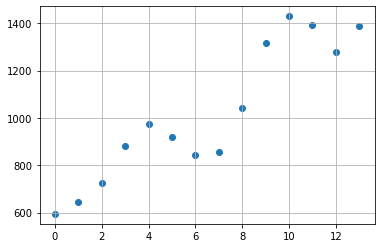

In [21]:
x = np.linspace(0,13,len(data))

plt.figure()
plt.scatter(x,data)
plt.grid()

In [22]:
def funcion_costo(beta, X, y, size):
    beta = np.reshape(beta,[size,-1]) 
    pred= X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo [0][0]

# Construyendo matriz X
ones = np.ones([len(data),1])
x_1 = np.reshape(x,[len(data),-1])
x_2 = np.reshape(x**2,[len(data),-1])
x_3 = np.reshape(x**3,[len(data),-1])
x_4 = np.reshape(x**4,[len(data),-1])
x_5 = np.reshape(x**5,[len(data),-1])

X1 = np.hstack((ones,x_1))
X2 = np.hstack((ones,x_1,x_2))
X3 = np.hstack((ones,x_1,x_2,x_3))
X4 = np.hstack((ones,x_1,x_2,x_3,x_4))
X5 = np.hstack((ones,x_1,x_2,x_3,x_4,x_5))

#beta 
beta_inicial_1 = np.random.rand(2)
beta_inicial_2 = np.random.rand(3)
beta_inicial_3= np.random.rand(4)
beta_inicial_4= np.random.rand(5)
beta_inicial_5= np.random.rand(6)


y = np.reshape(data,[len(data),-1])

In [23]:
print("Grado 1:",funcion_costo(beta_inicial_1,X1,y,2))
print("Grado 2:",funcion_costo(beta_inicial_2,X2,y,3))
print("Grado 3:",funcion_costo(beta_inicial_3,X3,y,4))
print("Grado 4:",funcion_costo(beta_inicial_4,X4,y,5))
print("Grado 5:",funcion_costo(beta_inicial_5,X5,y,6))

Grado 1: 15575544.374885634
Grado 2: 14732466.344283577
Grado 3: 6791063.866612202
Grado 4: 1333578971.6322353
Grado 5: 105163086540.284


In [24]:
sol1 = opt.minimize(funcion_costo,beta_inicial_1,args=(X1,y,2))
sol1

      fun: 155674.7628131872
 hess_inv: array([[ 0.12883197, -0.01431814],
       [-0.01431814,  0.00220155]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([602.76858048,  64.21472449])

In [28]:
sol2 = opt.minimize(funcion_costo,beta_inicial_2,args=(X2,y,3))
sol2

      fun: 155674.61137103202
 hess_inv: array([[ 2.59574260e-01, -7.84668798e-02,  4.89059376e-03],
       [-7.84668798e-02,  3.34221743e-02, -2.37188145e-03],
       [ 4.89059376e-03, -2.37188145e-03,  1.79925854e-04]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([6.02955799e+02, 6.41210515e+01, 7.20695071e-03])

In [29]:
sol3 = opt.minimize(funcion_costo,beta_inicial_3,args=(X3,y,4))
sol3

      fun: 152011.4948257716
 hess_inv: array([[ 4.53379568e-05, -7.11093661e-04,  1.78835549e-04,
        -1.00833228e-05],
       [-7.11093661e-04,  5.69954394e-02, -1.31145105e-02,
         6.96971872e-04],
       [ 1.78835549e-04, -1.31145105e-02,  3.21178144e-03,
        -1.77206368e-04],
       [-1.00833228e-05,  6.96971872e-04, -1.77206368e-04,
         1.00259293e-05]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 125
      nit: 11
     njev: 25
   status: 0
  success: True
        x: array([ 6.30711294e+02,  3.25162977e+01,  6.31520359e+00, -3.23486655e-01])

In [31]:
sol4 = opt.minimize(funcion_costo,beta_inicial_4,args=(X4,y,5))
sol4

      fun: 106381.97760248973
 hess_inv: array([[ 6.15551419e-07,  3.48987465e-05, -4.35677186e-05,
         7.80673025e-06, -3.64786406e-07],
       [ 3.48987465e-05,  3.74489127e-03, -4.56290429e-03,
         7.86152324e-04, -3.55909446e-05],
       [-4.35677186e-05, -4.56290429e-03,  5.56895890e-03,
        -9.63617052e-04,  4.37794050e-05],
       [ 7.80673025e-06,  7.86152324e-04, -9.63617052e-04,
         1.69789383e-04, -7.82849010e-06],
       [-3.64786406e-07, -3.55909446e-05,  4.37794050e-05,
        -7.82849010e-06,  3.65553281e-07]])
      jac: array([ 1.95312500e-03, -8.78906250e-03, -9.96093750e-02, -1.18164062e+00,
       -1.41347656e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 11
     njev: 35
   status: 2
  success: False
        x: array([ 5.47916974e+02,  2.23195031e+02, -6.54306284e+01,  8.45778184e+00,
       -3.37741169e-01])

In [32]:
sol5 = opt.minimize(funcion_costo,beta_inicial_5,args=(X5,y,6))
sol5

      fun: 105833.76513514694
 hess_inv: array([[ 1.33099705e-01,  1.50109560e-02, -5.48876850e-02,
         1.50111231e-02, -1.44392712e-03,  4.64275586e-05],
       [ 1.50109560e-02,  4.26367013e-03, -1.42075354e-02,
         4.26351466e-03, -4.36523607e-04,  1.46611963e-05],
       [-5.48876850e-02, -1.42075354e-02,  4.81370523e-02,
        -1.42074809e-02,  1.43564576e-03, -4.77294167e-05],
       [ 1.50111231e-02,  4.26351466e-03, -1.42074809e-02,
         4.26350518e-03, -4.36522821e-04,  1.46611719e-05],
       [-1.44392712e-03, -4.36523607e-04,  1.43564576e-03,
        -4.36522821e-04,  4.51922261e-05, -1.53152832e-06],
       [ 4.64275587e-05,  1.46611963e-05, -4.77294167e-05,
         1.46611719e-05, -1.53152832e-06,  5.22930285e-08]])
      jac: array([0.00000000e+00, 0.00000000e+00, 9.76562500e-04, 8.78906250e-03,
       1.19140625e-01, 1.90917969e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 278
      nit: 19
     njev: 39
   s

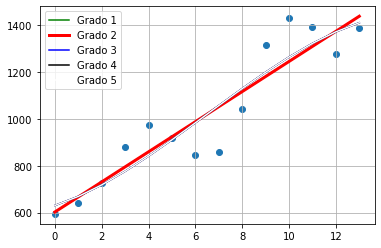

In [34]:
y_pred_1 = 602.76858048 + 64.21472449*x
y_pred_2 = 6.02955799e+02 + 6.41210515e+01*x + 7.20695071e-03*x**2
y_pred_3 = 6.30711294e+02 + 3.25162977e+01*x + 6.31520359e+00*x**2 -3.23486655e-01*x**3
y_pred_4 = 5.47916974e+02 + 2.23195031e+02*x - 6.54306284e+01*x**2 + 8.45778184e+00*x**3 - 3.37741169e-01*x**4
y_pred_4 = 5.47916974e+02 + 2.23195031e+02*x - 6.54306284e+01*x**2 + 8.45778184e+00*x**3 - 3.37741169e-01*x**4
y_pred_5 = 5.55026441e+02 + 1.90730136e+02*x - 4.54463164e+01*x**2 + 4.16503410e+00*x**3 + 3.93263795e-02*x**4 - 1.16021161e-02*x**5


plt.figure()
plt.scatter(x,data)
plt.plot(x,y_pred_1,"g",label='Grado 1')
plt.plot(x,y_pred_2,"r",label='Grado 2',linewidth=3)
plt.plot(x,y_pred_3,"b",label='Grado 3')
plt.plot(x,y_pred_3,"k",label='Grado 4')
plt.plot(x,y_pred_3,"w",label='Grado 5')

plt.legend()
plt.grid()

¿Que polinomio se ajusta mejor?

-El de grado 2